In [1]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

In [2]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

# An example

Pitch material is drawn from J. S. Bach's musical signature (Bb, A, C, B, or BACH in german notation). Bach himself used this motto in this fugue https://youtu.be/CpnfQntMisc?t=576 (the first 4 notes you hear!), where his unrivalled capacity to express creativity and affect within the well-defined (algorithmic?) mechanisms of a fugue is on display.

Now, let's look at this code (which has nothing to do with Bach's fugue!). Can you figure out what is going on in this "piece"? What could the musical idea be? What determines when the piece ends? Is this really one piece?

*The idea behind this piece is to let the letters in the motto to "fight against each other for survival". They undergo an aleatoric selection over several iterations. In each iterations, notes are drawn from the moddo. Some notes from the motto might be sampled more frequently than the others. The following iteration is sampled from the output of the preceding iteration, so that imbalances are amplified from iteration to iteration, until just one note survives. When only one note is left, though, there can be no variation anynmore. Slowly, music starts dying. This is represented in the Coda of the piece, where tempo starts to slow down and rhythmic variability is progressively reduced.*

In [8]:
BACH = ['Bb4', 'A4', 'C5', 'B4'] #Define pitch material: BACH motto in octave 4 (with the closest C being C5)
durations = [1.5, 1, 0.5, 0.5, 0.5] #Each bar will comprise these durations, arranged in random order. Since there are 5 events and only 4 notes in the motto, each bar will contain at least one repeated note from the motto

n_bars_per_group = 3 #Each iteration comprises 3 bars

bpm = 220 #Set the tempo
timeSig = '4/4' #Set the meter

#Create the main Stream object
s = stream.Stream()
s.append(tempo.MetronomeMark(number = bpm))
s.append(meter.TimeSignature('4/4'))

#Initialise measure count
measure_count = 0 
motto = BACH

#Iterate over iterations until only one unique note is left in the motto
while len(set(motto)) > 1 :
    
    #In each iteration, there are 3 bars. For each of these 3 bars...
    for bar in range(n_bars_per_group):
        
        #define a measure object numbered according to the measure counter
        m = stream.Measure(measure_count)

        #reorder the durations randomly
        random.shuffle(durations)
    
        #assign a random pitch from motto to each duration in the randomly reordered set of durations
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in durations]
        #insert the notes in the measure 
        m.append(selected_notes)
        
        #append the measure to the stream
        s.append(m)
        
        #update the measure count
        measure_count += 1
    
    #at the end of an iteration, redefine motto as the list of pitches that have been selected in that iteration.
    #This will be the motto for the next iteration
    motto = list(s[-n_bars_per_group:].flat.pitches)


#THE CODA STARTS HERE!
#When only one pitch from the motto is left...

#start discarding the shortest duration
durations = sorted(durations)[1:]

#set a slowing-down factor
slower = 1.5

#Keep iterating until only one duration is left...
while len(durations) >= 1:
    
    #reassign a slowed down tempo
    m.append(tempo.MetronomeMark(number = bpm/slower))
    
    #for each bar in this iteration...
    for bar in range(n_bars_per_group):
        
        #If the sum of the remaining durations is an integer multiple of a quarter-note, set the meter unit in x/4, otherwise set the meter unit as x/8.
        total_duration = sum(durations)
        if int(total_duration) != total_duration:
            n_beats = str(int(2*total_duration))
            unit = '8'
        else:
            n_beats = str(int(total_duration))
            unit = '4'
        
        #Create a measure object with the new meter
        m = stream.Measure(measure_count)
        m.append(meter.TimeSignature(n_beats+'/'+unit))

        #create a copy of the durations and reorder them randomly
        sample_durations = durations.copy()
        random.shuffle(sample_durations)
        
        #create notes with the remaining (shuffled) durations
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in sample_durations]
        
        #append the notes to the measure and the measure to the stream
        m.append(selected_notes)
        s.append(m)
        
        #updat emeasure count
        measure_count += 1
    
    #At the end of the iteration, drop the shortest duration and increase the slowing-down factor
    durations = durations[1:]
    slower += 0.5

# Exercise: Mozart's Würfelspiel

In [10]:
def notes_from_list(notes):
    #Takes a list of pitches and durations and returns a list of musci21 Note or Chord objects, as appropriate
    #Each entry in the input list can either be a duration (rest), or in the form [pitchName, duration] (individual note) or [[pitchName1, pitchName2, ...], duration] (chord)
    
    output = []
    for item in notes:
        if type(item) in [int, float]: #rest
            output += [note.Rest(quarterLength = item)]
        elif type(item[0]) == str: #note
            output += [note.Note(item[0], quarterLength = item[1])]
        elif type(item[0] == list): #chord
            output += [chord.Chord(item[0], quarterLength = item[1])]
        else:
            print('Wrong input format')
    return output
    

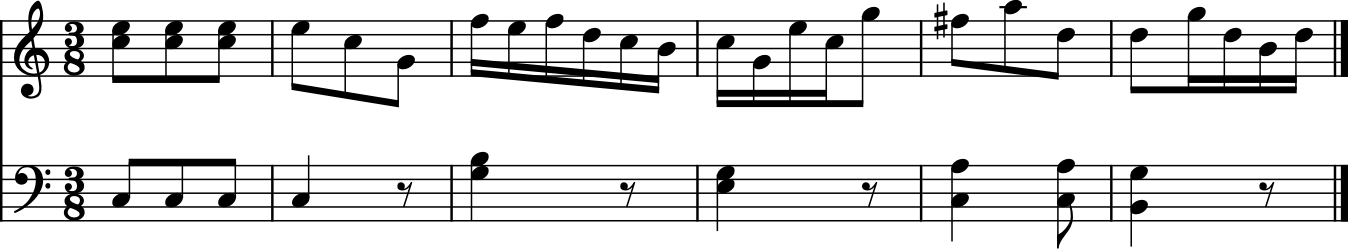

In [28]:
N_bars = 6 #set number of bars

#Options 40 and 54 for bar A
Ar = (
    (('C5', 1/4), ('B4',1/4),('C5', 1/4),('E5', 1/4), ('G4', 1/4), ('C5', 1/4)), 
    ((('C5', 'E5'), 1/2), (('C5', 'E5'),  1/2),(('C5', 'E5'), 1/2))
)
Al = (
    ((('C3', 'E3'), 1),  1/2),  
      (('C3', 1/2), ('C3',  1/2), ('C3', 1/2))
)

#Options 22 and 95 for bar B
Br = (
    (('E5', 1/2), ('C5', 1/2), ('G4', 1/2)),
    (('G5', 1/2), ('E5', 1/2), ('C5', 1/2))
)
Bl = (
    (('C3', 1), 1/2),
    ((('C3', 'E3'), 1), 1/2)
)

#Options 27 and 163 for bar C
Cr = (
    (('F5', 1/4), ('E5', 1/4), ('F5', 1/4), ('D5', 1/4), ('C5', 1/4), ('B4', 1/4)),
    (('G5', 1/4), ('F#5', 1/4), ('G5', 1/4), ('D5', 1/4), ('B4', 1/4), ('G4', 1/4))
)
Cl = (
    ((('G3', 'B3'), 1), 1/2),
    ((('B2', 'D3'), 1), 1/2)
)

#Options 41 and 156 for bar D
Dr = (
    (('C5', 1/4), ('B4', 1/4), ('C5', 1/4), ('E5', 1/4), ('G4', 1/2)),
    (('C5', 1/4), ('G4', 1/4), ('E5', 1/4), ('C5', 1/4), ('G5', 1/2))
)
Dl = (
    ((('C3', 'E3'), 1), 1/2),
    ((('E3', 'G3'), 1), 1/2)
)

#Options 99 and 146 for bar E
Er = (
    (('F#5', 1/2), ('A5', 1/2), ('D5', 1/2)),
    ((('F#4', 'D5'), 1/2), (('D5', 'F#5'), 1/2), (('F#5', 'A5'), 1/2))
    
)
El = (
    ((('C3', 'A3'), 1), (('C3', 'A3'), 1/2)),
    (('C3', 1/2), ('C3', 1/2), ('C3', 1/2))
)

#Options 37 and 133 for bar F
Fr = (
    (('G5', 1/4), ('B5', 1/4), ('G5', 1/4), ('D5', 1/4), ('B4', 1/2)),
    (('D5', 1/2), ('G5', 1/4), ('D5', 1/4), ('B4', 1/4), ('D5', 1/4))

    
)
Fl = (
    ((('B2', 'D3'), 1), 1/2),
    ((('B2', 'G3'), 1), 1/2)

)

#Options 21 and 11 for bar G
Fr = (
    (('C5', 1/4), ('E5', 1/4), ('G5', 1/4), ('D5', 1/4), ('A4', 1/4), ('F#5', 1/4)),
    (('E5', 1/4), ('C5', 1/4), ('B4', 1/4), ('A4', 1/4), ('G4', 1/4), ('F#4', 1/4)),
    
   

    
)
Fl = (
    (('C3', 1/2), ('D3', 1/2), ('D2', 1/2)),
    (('C3', 1/2), ('D3', 1/2), ('D2', 1/2)),


)




#Create the score
Menuet = stream.Score()

#Create right-and left-hand parts, in 3/8 meter
RightHand = stream.Part()
RightHand.append(meter.TimeSignature('3/8'))
LeftHand = stream.Part()
LeftHand.append(meter.TimeSignature('3/8'))

#Insert right- and left-hand parts at the beginning of the score
Menuet.insert(0, RightHand)
Menuet.insert(0, LeftHand)

#Lists of all options for each bar, in right and left hand respectively
right = [Ar, Br, Cr, Dr, Er, Fr]
left = [Al, Bl, Cl, Dl, El, Fl]

#Compose the random Menuet!
for bar in range(N_bars): #for each bar
    flip = random.randint(0,1) #coin toss (randomly select 0 or 1)
    RightHand.append(notes_from_list(right[bar][flip])) #append to right hand the randomly selected option for bar
    LeftHand.append(notes_from_list(left[bar][flip])) #append to left hand the randomly selected option for bar


Menuet.show()

In [29]:
play(Menuet)